In [1]:
import yfinance as yf 
import pandas as pd 
import os 
import matplotlib.pyplot as plt

In [2]:
aapl = yf.download('AAPL',start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
data = aapl
data = data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139946,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785919,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
...,...,...,...,...,...,...,...
613,2022-06-07,144.350006,149.000000,144.100006,148.710007,148.710007,67808200
614,2022-06-08,148.580002,149.869995,147.460007,147.960007,147.960007,53950200
615,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,69473000
616,2022-06-10,140.279999,140.759995,137.059998,137.130005,137.130005,91437900


In [4]:
# 기준선 
def kijun_seon (Data, close, high, low, kijun_lookback, where):
    
    for i in range(len(Data)):
        try:
            Data[i, whrere] = max(Data[i - kijun_lookback:i +1, high]) + min(Data[i - kijun_lookback:i +1, low])
            
        except ValueError:
            pass
    Data[:, where] = Data[:, where]/2
    
    return Data

In [4]:
high_prices = data['High']
close_prices = data['Close']
low_prices = data['Low']
dates = data['Date']  # contains datetime objects

In [27]:
#전환선 (9기간 고가 + 9기간 ) /2 
period9_high = high_prices.rolling(window=9).max()
period9_low = low_prices.rolling(window=9).min()
tenkan_sen =(period9_high + period9_low) / 2

# #기준선 ( 26기간 고가 + 26기간저가 )/2
period26_high = high_prices.rolling(window=26).max()
period26_low = low_prices.rolling(window=26).min()
kijun_sen =(period9_high + period9_low) / 2

# #선행 스팬 1
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26) # shift() 앞으로 이동 

# #선행 스팬 2
period52_high = high_prices.rolling(window=52).max()
period52_low = high_prices.rolling(window=52).min()
senkou_span_b = ((period52_high + period52_low) / 2).shift(26)


# #후행 스팬 
chikou_span = close_prices.shift(-26) # 후행스팬 당일의 종가 당일 포함 26일 위치에 나나탠 선 


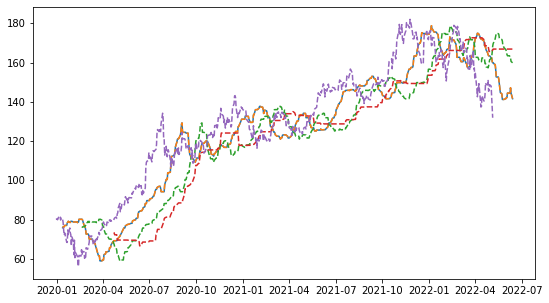

In [26]:
plt.figure(figsize=(9, 5))
plt.plot(aapl.index, tenkan_sen, label='tenkan_sen')
plt.plot(aapl.index, kijun_sen, linestyle='dashed', label='Upperkijun_senband')
plt.plot(aapl.index, senkou_span_a, linestyle='dashed', label='Moving senkou_span_a 20')
plt.plot(aapl.index, senkou_span_b, linestyle='dashed', label='senkou_span_b band')
plt.plot(aapl.index, chikou_span, linestyle='dashed', label='chikou_span')




In [5]:
# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
period9_high = pd.rolling_max(high_prices, window=9)
period9_low = pd.rolling_min(low_prices, window=9)
tenkan_sen = (period9_high + period9_low) / 2

# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high = pd.rolling_max(high_prices, window=26)
period26_low = pd.rolling_min(low_prices, window=26)
kijun_sen = (period26_high + period26_low) / 2

# Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)

# Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
period52_high = pd.rolling_max(high_prices, window=52)
period52_low = pd.rolling_min(low_prices, window=52)
senkou_span_b = ((period52_high + period52_low) / 2).shift(26)

# The most current closing price plotted 22 time periods behind (optional)
chikou_span = close_prices.shift(-22) # 22 according to investopedia

AttributeError: module 'pandas' has no attribute 'rolling_max'

In [28]:
df= pd.DataFrame()
df['Close'] = close_prices
df['senkou_span_a']=senkou_span_a
df['senkou_span_b']=senkou_span_b
df['kijun_sen']=kijun_sen
df['tenkan_sen']=tenkan_sen


In [32]:
df.head(30)

,Close,senkou_span_a,senkou_span_b,kijun_sen,tenkan_sen
0,73.412498,NaN,NaN,NaN,NaN
1,75.087502,NaN,NaN,NaN,NaN
2,74.357498,NaN,NaN,NaN,NaN
3,74.949997,NaN,NaN,NaN,NaN
4,74.597504,NaN,NaN,NaN,NaN
5,75.797501,NaN,NaN,NaN,NaN
6,77.407501,NaN,NaN,NaN,NaN
7,77.582497,NaN,NaN,NaN,NaN
8,79.239998,NaN,NaN,75.823750,75.823750
9,78.169998,NaN,NaN,76.290001,76.290001


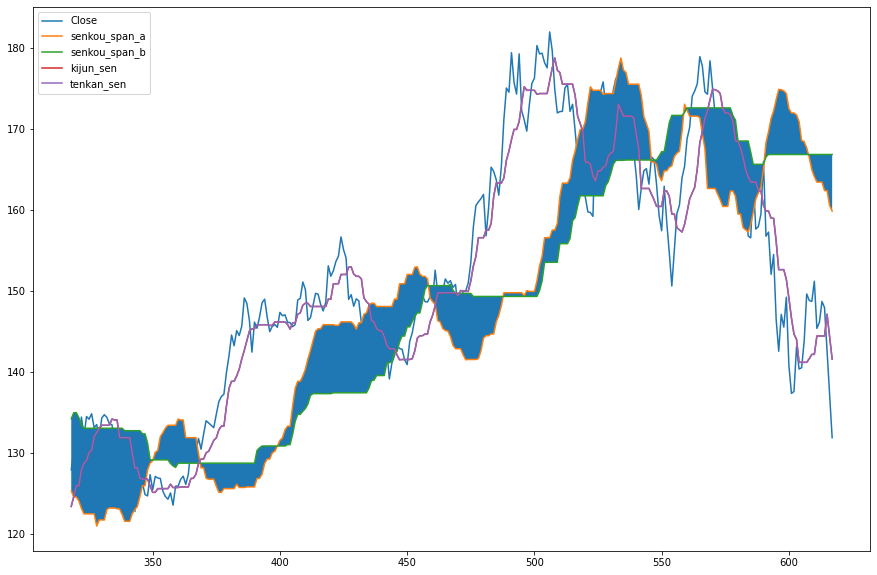

In [34]:
tmp = df[['Close','senkou_span_a','senkou_span_b','kijun_sen','tenkan_sen']].tail(300)
a1 = tmp.plot(figsize=(15,10))
a1.fill_between(tmp.index, tmp.senkou_span_a, tmp.senkou_span_b) # 구름대 형성 